In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mas_housing.csv')
len(df)

53883

In [3]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,location,price,rooms,bathrooms,car_parks,property_type,size,furnishing
0,"klcc,_kuala_lumpur","rm_1,250,000",2+1,3.0,2.0,serviced_residence,"built-up_:_1,335_sq._ft.",fully_furnished
1,"damansara_heights,_kuala_lumpur","rm_6,800,000",6,7.0,NaN,bungalow,land_area_:_6900_sq._ft.,partly_furnished
2,"dutamas,_kuala_lumpur","rm_1,030,000",3,4.0,2.0,condominium_(corner),"built-up_:_1,875_sq._ft.",partly_furnished
3,"cheras,_kuala_lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bukit_jalil,_kuala_lumpur","rm_900,000",4+1,3.0,2.0,condominium_(corner),"built-up_:_1,513_sq._ft.",partly_furnished


In [6]:
df.isnull().sum()

location             0
price              248
rooms             1706
bathrooms         2013
car_parks        17567
property_type       25
size              1063
furnishing        6930
dtype: int64

In [7]:
#data tranforming
df['price'] = df['price'].str.replace(',', '').str.extract('(\d+)').astype(float)
df['size'] = df['size'].str.replace(',', '').str.extract('(\d+)').astype(float)
df['furnishing'] = df['furnishing'].mask(df['furnishing'] == 'unknown', np.nan)
df['rooms'] = df['rooms'].apply(lambda x: sum(map(int, x.split('+'))) if (pd.notnull(x) and all(part.isdigit() for part in x.split('+'))) else np.nan)

#data cleaning
df = df.dropna(subset=['size'])
df = df.dropna(subset=['price'])
df = df.dropna(subset=['rooms'])
df = df.dropna(subset='property_type')
df.furnishing = df.furnishing.fillna(0)
df.car_parks = df.car_parks.fillna(df.car_parks.mean()).astype(int)
df.bathrooms = df.bathrooms.fillna(df.bathrooms.mean()).astype(int)

# Create a mapping to group similar property types
property_mapping = {
    'condominium': 'condominium',
    'terrace': 'terrace',
    'residential_land': 'terrace',
    'bungalow': 'bungalow',
    'semi-detached_house': 'semi-detached_house',
    'flat': 'flat',
    'townhouse': 'terrace',
    'apartment': 'apartment',
    'serviced_residence': 'serviced_residence',
    'cluster_house': 'terrace'
}

# Function to apply mapping and group similar property types
def group_property_type(property_type):
    for key, value in property_mapping.items():
        if key in property_type:
            return value
    return property_type

# Apply the mapping function to create a new column
df['property_type'] = df['property_type'].apply(group_property_type)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
df.head()

,location,price,rooms,bathrooms,car_parks,property_type,size,furnishing
0,"klcc,_kuala_lumpur",1250000.0,3.0,3,2,serviced_residence,1335.0,fully_furnished
1,"damansara_heights,_kuala_lumpur",6800000.0,6.0,7,2,bungalow,6900.0,partly_furnished
2,"dutamas,_kuala_lumpur",1030000.0,3.0,4,2,condominium,1875.0,partly_furnished
4,"bukit_jalil,_kuala_lumpur",900000.0,5.0,3,2,condominium,1513.0,partly_furnished
5,"taman_tun_dr_ismail,_kuala_lumpur",5350000.0,6.0,5,4,bungalow,7200.0,partly_furnished


In [9]:
df = df.reset_index(drop=True)
df.head()

,location,price,rooms,bathrooms,car_parks,property_type,size,furnishing
0,"klcc,_kuala_lumpur",1250000.0,3.0,3,2,serviced_residence,1335.0,fully_furnished
1,"damansara_heights,_kuala_lumpur",6800000.0,6.0,7,2,bungalow,6900.0,partly_furnished
2,"dutamas,_kuala_lumpur",1030000.0,3.0,4,2,condominium,1875.0,partly_furnished
3,"bukit_jalil,_kuala_lumpur",900000.0,5.0,3,2,condominium,1513.0,partly_furnished
4,"taman_tun_dr_ismail,_kuala_lumpur",5350000.0,6.0,5,4,bungalow,7200.0,partly_furnished


49973


<Axes: xlabel='price', ylabel='Count'>

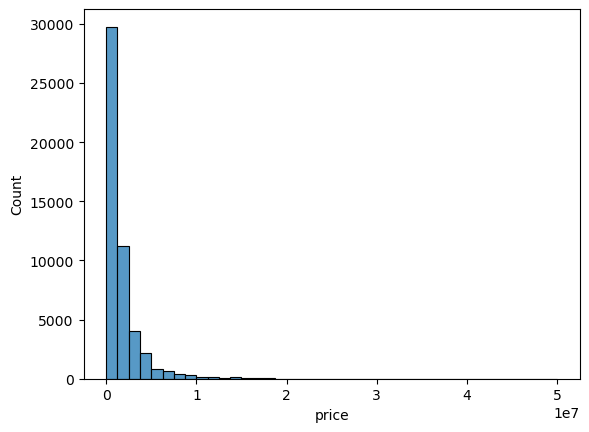

In [10]:
print(len(df))
sns.histplot(df.price[df.price < 100000000], bins=40)

<Axes: xlabel='price', ylabel='Count'>

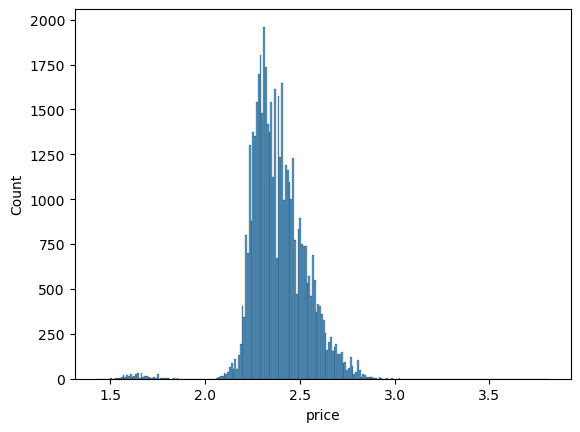

In [11]:
rooted_price = df.price ** (1/16)
sns.histplot(rooted_price)

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

In [13]:
y_train = df_train.price.values ** (1/16)
y_val = df_val.price.values ** (1/16)
y_test = df_test.price.values ** (1/16)

In [14]:
del df_train['price']
del df_val['price']
del df_test['price']

In [15]:
def linear_regression(xi):
    xi = [1] + xi
    return xi.dot(w)

In [16]:
def train_linear_regression(X, y):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # The equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

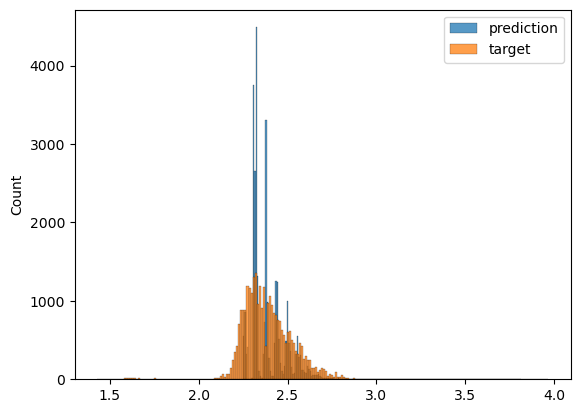

In [17]:
base = ['rooms', 'bathrooms', 'car_parks', 'size']
df_num = df_train[base]
X_train = df_num.values

#train the model
w_0, w = train_linear_regression(X_train, y_train)

#target prediction
y_pred = w_0 + X_train.dot(w)

#check histogram if the prediction is close to the actual price
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [18]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_train, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.4887152367670581


In [19]:
df_num = df_val[base]
X_val = df_num.values

#predict validation
y_pred = w_0 + X_val.dot(w)

#check performance
print(f'R-squared: {r2_score(y_val, y_pred)}')

R-squared: 0.43613464402375357


In [20]:
def prepare_X(df):
    #create copy prevent side effect
    df = df.copy()
    features = base.copy()
    
    df_num = df[features]
    X = df_num.values
    return X

In [21]:
df.property_type.unique()

array(['serviced_residence', 'bungalow', 'condominium',
       'semi-detached_house', 'terrace', 'apartment', 'flat'],
      dtype=object)

In [22]:
df.furnishing.unique()

array(['fully_furnished', 'partly_furnished', 'unfurnished', 0],
      dtype=object)

In [23]:
df.location.unique()

array(['klcc,_kuala_lumpur', 'damansara_heights,_kuala_lumpur',
       'dutamas,_kuala_lumpur', 'bukit_jalil,_kuala_lumpur',
       'taman_tun_dr_ismail,_kuala_lumpur', 'sri_petaling,_kuala_lumpur',
       'bukit_tunku_(kenny_hills),_kuala_lumpur',
       'mont_kiara,_kuala_lumpur', 'desa_parkcity,_kuala_lumpur',
       'bangsar_south,_kuala_lumpur', 'ampang_hilir,_kuala_lumpur',
       'kepong,_kuala_lumpur',
       'jalan_klang_lama_(old_klang_road),_kuala_lumpur',
       'sungai_besi,_kuala_lumpur', 'kl_city,_kuala_lumpur',
       'kl_sentral,_kuala_lumpur', 'taman_melawati,_kuala_lumpur',
       'setapak,_kuala_lumpur', 'city_centre,_kuala_lumpur',
       'country_heights_damansara,_kuala_lumpur',
       'taman_desa,_kuala_lumpur', 'sentul,_kuala_lumpur',
       'bangsar,_kuala_lumpur', 'segambut,_kuala_lumpur',
       'wangsa_maju,_kuala_lumpur', 'batu_caves,_kuala_lumpur',
       'ampang,_kuala_lumpur', 'sri_hartamas,_kuala_lumpur',
       'cheras,_kuala_lumpur', 'bukit_kiara,_ku

In [24]:
def prepare_X(df):
    #create copy prevent side effect
    df = df.copy()
    features = base.copy()
    
    for v in ['terrace', 'bungalow', 'condominium', 'semi-detached_house', 'apartment', 'flat']:
        feature = 'property_type_is_%s' % v
        df[feature] = (df['property_type'] == v).astype(int)
        features.append(feature)
    
    for v in ['fully_furnished', 'partly_furnished', 'unfurnished']:
        feature = 'furnishing_status_is_%s' % v
        df[feature] = (df['furnishing'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    X = df_num.values
    return X

validation: 0.5237084661307303


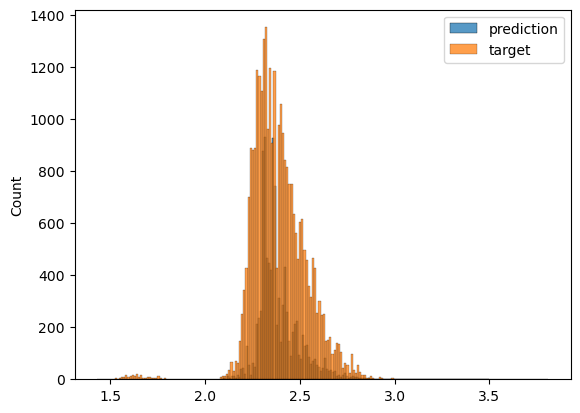

In [25]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print(f'validation: {r2_score(y_val, y_pred)}')

#check histogram if the prediction is close to the actual price
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [26]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

validation: 0.5237084660671354
0.5237084661308375


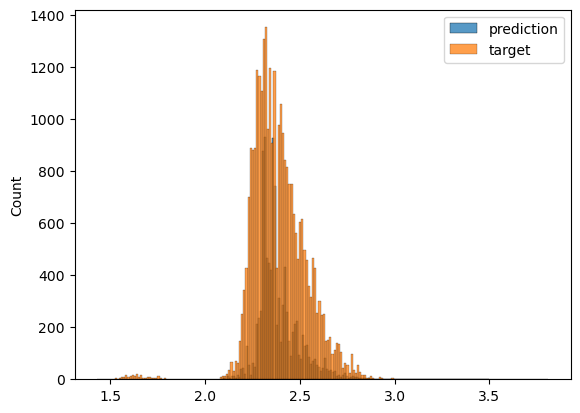

In [27]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print(f'validation: {r2_score(y_val, y_pred)}')

#check histogram if the prediction is close to the actual price
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

model.fit(X_train, y_train)
print(model.score(X_val, y_val))

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_model.score(X_val, y_val)

0.6800181829787258